In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras.datasets import mnist
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
print("Initial shape of dimensions of x_train",str(x_train.shape))
print("Number of samples in our training data: "+ str(len(x_train)))
print("Number of labels in our training data: "+ str(len(y_train)))
print("Number of samples in ourtest training data: "+ str(len(x_test)))
print("Number of lables in our test data: "+ str(len(y_test)))
print("Dimensions of x_train: "+ str(x_train[0].shape))
print("labels in x_train: "+str(y_train.shape))
print("Dimension of x_test: "+str(x_test[0].shape))
print("labels in y_test: "+str(y_test.shape))

Initial shape of dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in ourtest training data: 10000
Number of lables in our test data: 10000
Dimensions of x_train: (28, 28)
labels in x_train: (60000,)
Dimension of x_test: (28, 28)
labels in y_test: (10000,)


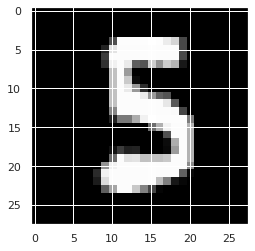

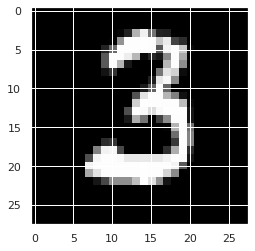

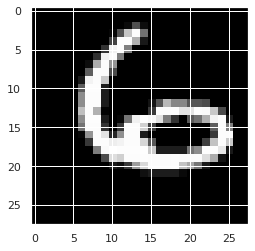

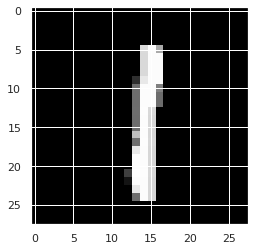

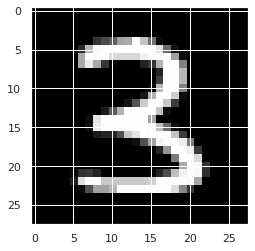

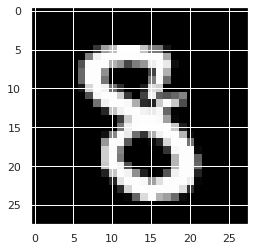

In [5]:
import cv2
for j in range(0,6):
  random_num = np.random.randint(0,len(x_train))
  plt.subplots(1,1)
  plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.show()

## Preparing the dataset

In [6]:
print(x_train.shape[0])

60000


In [11]:
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

x_train = x_train.reshape(x_train.shape[0],img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print("x_train shape: ", x_train.shape)
print(x_train.shape[0])

x_train shape:  (60000, 28, 28, 1)
60000


In [12]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [13]:
print("Number of classes: "+ str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of classes: 10


In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
          activation='relu',
          input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics= ['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [21]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test,y_test))

score = model.evaluate(x_test,y_test,verbose=0)
print("Test loss: ",score[0])
print("Test accuracy: ",score[1])

Epoch 1/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.2749 - accuracy: 0.9177 - val_loss: 0.1321 - val_accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.2079 - accuracy: 0.9382 - val_loss: 0.0954 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.1604 - accuracy: 0.9527 - val_loss: 0.0802 - val_accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.1327 - accuracy: 0.9599 - val_loss: 0.0638 - val_accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.1162 - accuracy: 0.9651 - val_loss: 0.0608 - val_accuracy: 0.9803
Epoch 6/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.1047 - accuracy: 0.9689 - val_loss: 0.0515 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0950 - accuracy: 0.9716 - val_loss: 0

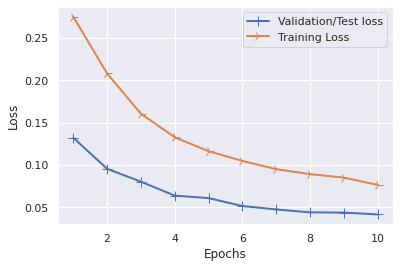

In [24]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values,label="Validation/Test loss")
line2 = plt.plot(epochs, loss_values, label="Training Loss")
plt.setp(line1, linewidth=2.0, marker ='+',markersize=10.0)
plt.setp(line2, linewidth=2.0, marker ='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

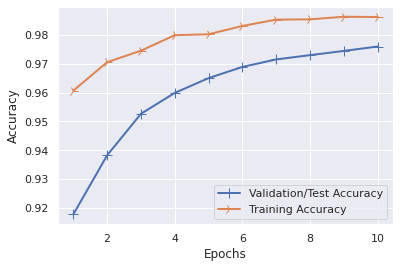

In [28]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs, acc_values,label="Validation/Test Accuracy")
line2 = plt.plot(epochs, val_acc_values, label="Training Accuracy")
plt.setp(line1, linewidth=2.0, marker ='+',markersize=10.0)
plt.setp(line2, linewidth=2.0, marker ='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()